<a href="https://colab.research.google.com/github/prangit95/pran_f2/blob/main/Apriori_algo_ass_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a Python program to implement the Apriori algorithm on a transactional dataset and generate association rules using minimum support and confidence thresholds. Display the resulting frequent itemsets and rules.

In [ ]:
#Apriori Algorithm
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

data = {
    'PID': [1, 2, 3, 4, 5],
    'Milk': [1, 0, 1, 1, 0],
    'Bread': [1, 1, 1, 0, 1],
    'Butter': [0, 1, 1, 1, 0],
    'Jam': [0, 0, 1, 0, 1]
}

df = pd.DataFrame(data).set_index('PID')
frequency = apriori(df, min_support=0.4, use_colnames=True)
rules = association_rules(frequency, metric="confidence", min_threshold=0.6)

print("\n Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence']])


 Association Rules:
  antecedents consequents  support  confidence
0      (Milk)     (Bread)      0.4    0.666667
1    (Butter)      (Milk)      0.4    0.666667
2      (Milk)    (Butter)      0.4    0.666667
3    (Butter)     (Bread)      0.4    0.666667
4       (Jam)     (Bread)      0.4    1.000000


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Write a Python program to implement the Apriori algorithm on a dataset of electronic product transactions. Convert the transactions to a DataFrame using TransactionEncoder, extract frequent itemsets, and generate association rules using confidence and lift as metrics.

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample transaction dataset
transactions = [
    ['laptop', 'mouse', 'keyboard'],
    ['mouse', 'keyboard'],
    ['laptop', 'headphones'],
    ['laptop', 'mouse'],
    ['laptop', 'mouse', 'keyboard', 'headphones'],
    ['mouse', 'headphones'],
    ['keyboard', 'laptop'],
    ['laptop', 'keyboard'],
    ['mouse', 'keyboard'],
    ['headphones', 'keyboard']
]
# TransactionEncoder to convert list of lists into dataframe
te = TransactionEncoder()
te_data = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_data, columns=te.columns_)
# Apply Apriori
frequent_items = apriori(df, min_support=0.3, use_colnames=True)
# Generate association rules using confidence metric
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.6)

# Display results
print("\n Frequent Itemsets:\n", frequent_items)
print("\n Association Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


 Frequent Itemsets:
    support            itemsets
0      0.4        (headphones)
1      0.7          (keyboard)
2      0.6            (laptop)
3      0.6             (mouse)
4      0.4  (laptop, keyboard)
5      0.4   (mouse, keyboard)
6      0.3     (laptop, mouse)

 Association Rules:
   antecedents consequents  support  confidence      lift
0    (laptop)  (keyboard)      0.4    0.666667  0.952381
1     (mouse)  (keyboard)      0.4    0.666667  0.952381


Write a Python program to implement Decision Tree Classification using the Iris dataset. Perform preprocessing, train the model using entropy as the splitting criterion, and visualize the resulting decision tree.

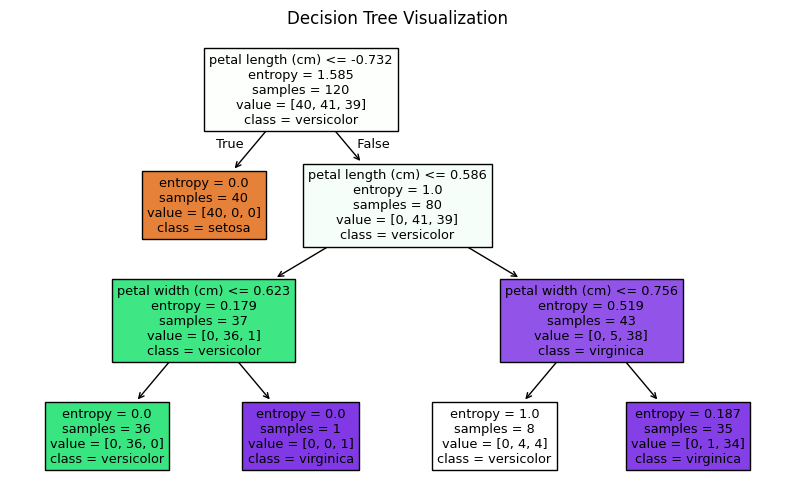

In [ ]:
# Decision Tree Classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn.tree import plot_tree
plt.figure(figsize=(10,6))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()